## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 1s 0us/step


-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

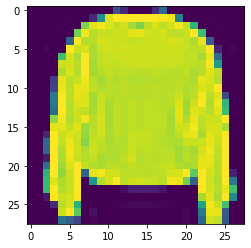

In [25]:
import matplotlib.pyplot as plt
plt.imshow(train_images[7]);

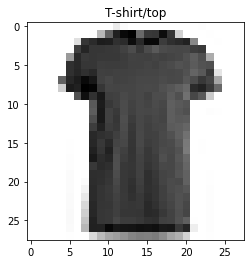

In [26]:
plt.imshow(train_images[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [22]:
import numpy as np
unique_labels = np.unique(train_labels, return_index=True)[1]


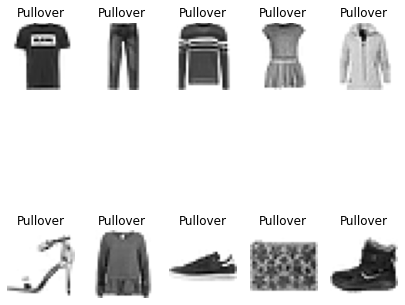

In [36]:
import random
plt.figure(figsize=(7, 7))
for i in range(10):
  ax = plt.subplot(2, 5, i + 1)
  #rand_index = random.choice(range(len(unique_labels)))
  plt.imshow(train_images[unique_labels[i]], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [37]:

tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history_1 = model_12.fit(train_images,
                            train_labels,
                            epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0637 - accuracy: 0.6467 - val_loss: 0.6983 - val_accuracy: 0.7811
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6061 - accuracy: 0.8026 - val_loss: 0.5965 - val_accuracy: 0.7931
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5279 - accuracy: 0.8199 - val_loss: 0.5272 - val_accuracy: 0.8182
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4965 - accuracy: 0.8277 - val_loss: 0.5152 - val_accuracy: 0.8200
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4783 - accuracy: 0.8328 - val_loss: 0.5175 - val_accuracy: 0.8155
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4651 - accuracy: 0.8367 - val_loss: 0.5035 - val_accuracy: 0.8239
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4572 - accuracy: 0.8398 - val_loss: 0.4976 - val_accuracy:

In [38]:
model_12.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 4710      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                70        
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_12.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.8291


[0.48204168677330017, 0.8291000127792358]